# Graph Theory Problems

Solutions to graph theory problems with visualizations

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Problem 1: Graph Examples

### 1. Examples of (directed) graphs and their transposed graphs

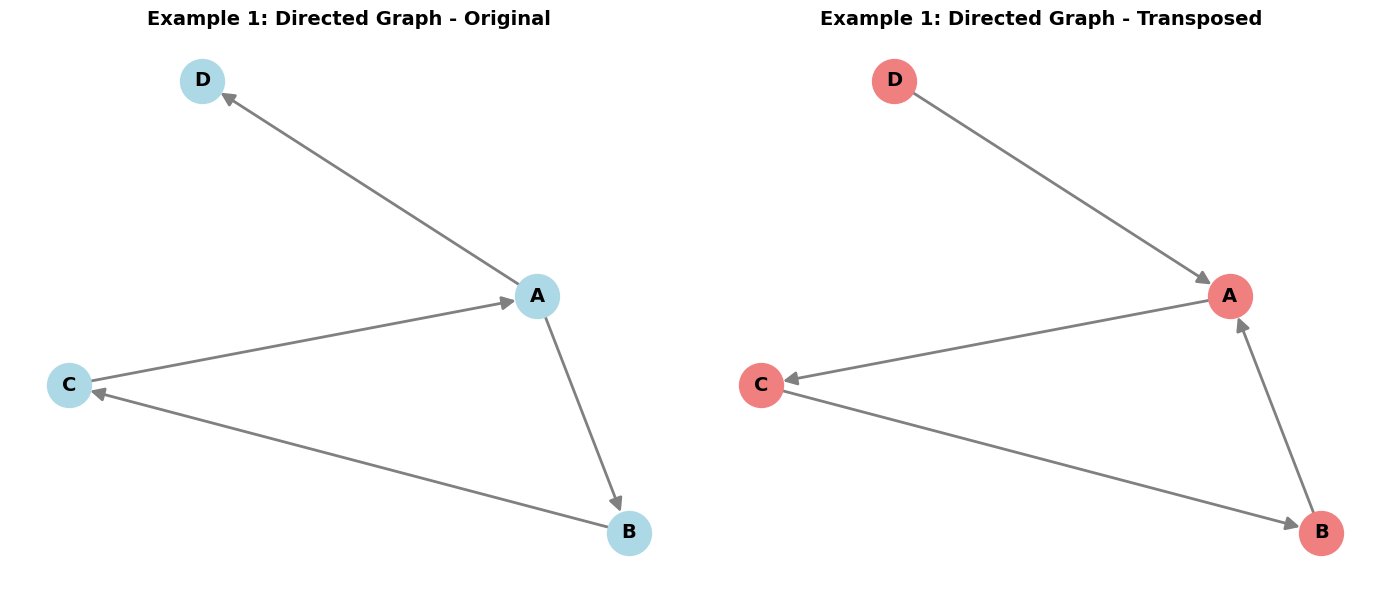

Original edges: [('A', 'B'), ('A', 'D'), ('B', 'C'), ('C', 'A')]
Transposed edges: [('A', 'C'), ('B', 'A'), ('C', 'B'), ('D', 'A')]



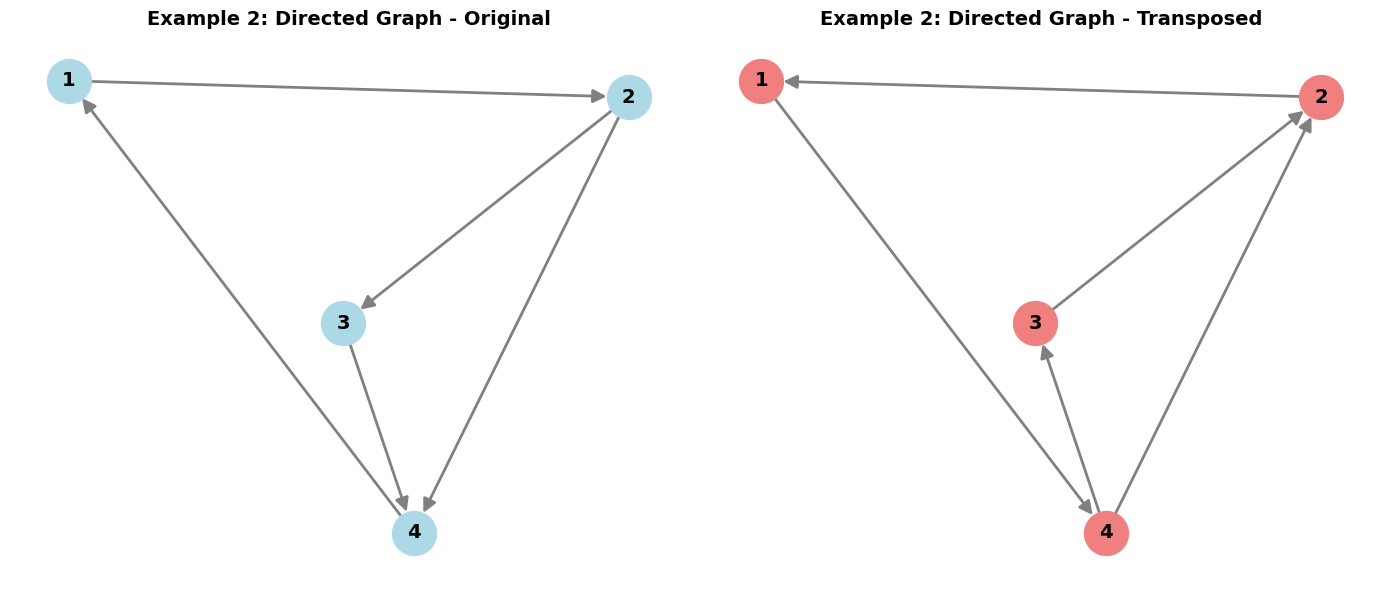

Original edges: [(1, 2), (2, 3), (2, 4), (3, 4), (4, 1)]
Transposed edges: [(1, 4), (2, 1), (3, 2), (4, 2), (4, 3)]



In [2]:
def draw_directed_graph_and_transpose(G, title):
    """Draw a directed graph and its transpose side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Original graph
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightblue',
            node_size=1000, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2)
    ax1.set_title(f'{title} - Original', fontsize=14, fontweight='bold')

    # Transposed graph
    G_T = G.reverse()
    nx.draw(G_T, pos, ax=ax2, with_labels=True, node_color='lightcoral',
            node_size=1000, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2)
    ax2.set_title(f'{title} - Transposed', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"Original edges: {list(G.edges())}")
    print(f"Transposed edges: {list(G_T.edges())}")
    print()

# Example 1: Simple directed graph
G1 = nx.DiGraph()
G1.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'A'), ('A', 'D')])
draw_directed_graph_and_transpose(G1, "Example 1: Directed Graph")

# Example 2: Another directed graph
G2 = nx.DiGraph()
G2.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)])
draw_directed_graph_and_transpose(G2, "Example 2: Directed Graph")

### 2. Examples of (undirected) graphs and their inverse graphs

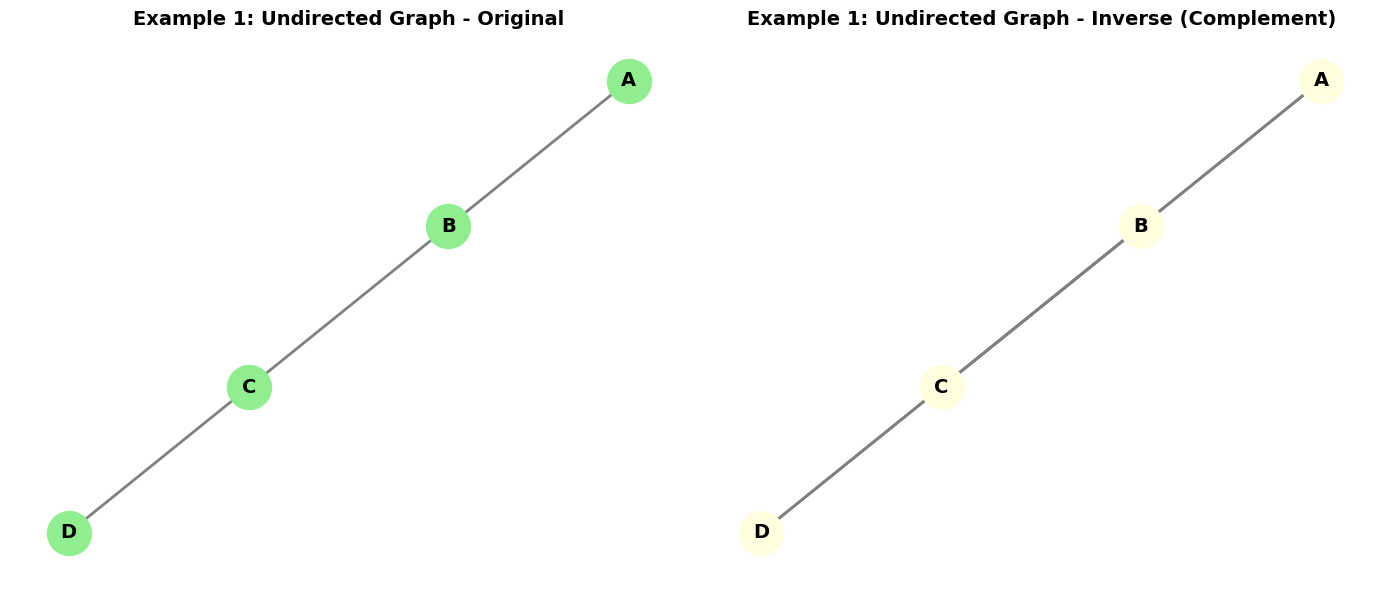

Original edges: [('A', 'B'), ('B', 'C'), ('C', 'D')]
Inverse edges: [('A', 'C'), ('A', 'D'), ('B', 'D')]



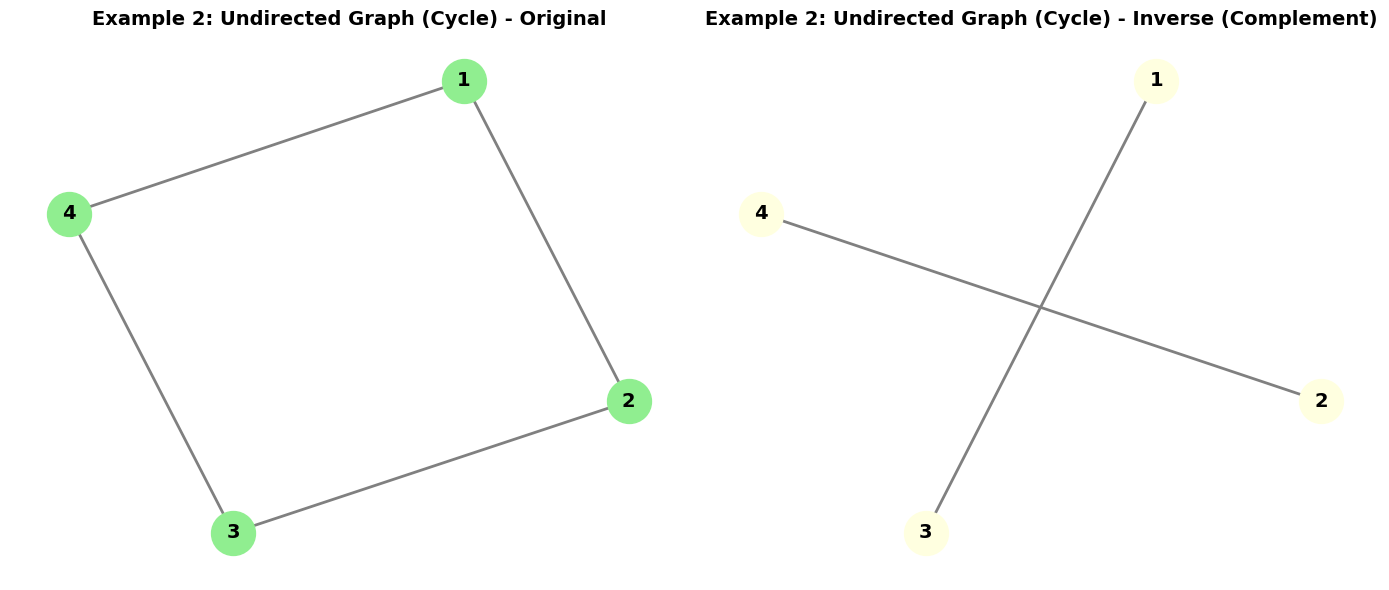

Original edges: [(1, 2), (1, 4), (2, 3), (3, 4)]
Inverse edges: [(1, 3), (2, 4)]



In [3]:
def draw_graph_and_inverse(G, title):
    """Draw an undirected graph and its inverse (complement) side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Original graph
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightgreen',
            node_size=1000, font_size=14, font_weight='bold',
            edge_color='gray', width=2)
    ax1.set_title(f'{title} - Original', fontsize=14, fontweight='bold')

    # Inverse (complement) graph
    G_inv = nx.complement(G)
    nx.draw(G_inv, pos, ax=ax2, with_labels=True, node_color='lightyellow',
            node_size=1000, font_size=14, font_weight='bold',
            edge_color='gray', width=2)
    ax2.set_title(f'{title} - Inverse (Complement)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print(f"Original edges: {list(G.edges())}")
    print(f"Inverse edges: {list(G_inv.edges())}")
    print()

# Example 1: Simple undirected graph
G3 = nx.Graph()
G3.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D')])
draw_graph_and_inverse(G3, "Example 1: Undirected Graph")

# Example 2: Another undirected graph
G4 = nx.Graph()
G4.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])
draw_graph_and_inverse(G4, "Example 2: Undirected Graph (Cycle)")

### 3. What happens if the original is dense for the inverse?

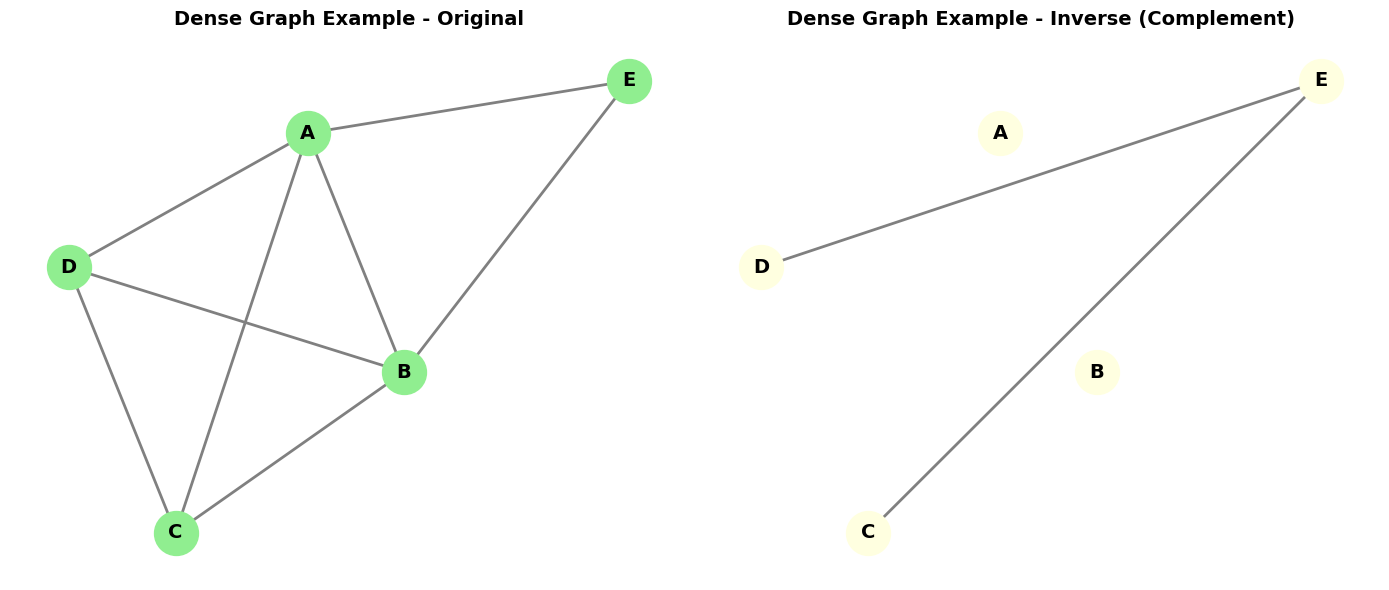

Original edges: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'D')]
Inverse edges: [('C', 'E'), ('D', 'E')]


Observation:
Original graph has 8 edges out of 10 possible edges
Inverse graph has 2 edges

When the original graph is dense (many edges), the inverse is sparse (few edges).
This is because the inverse contains only the edges that are NOT in the original.


In [4]:
# Create a dense graph (nearly complete)
G_dense = nx.Graph()
nodes = ['A', 'B', 'C', 'D', 'E']
G_dense.add_nodes_from(nodes)

# Add most possible edges (making it dense)
all_edges = list(combinations(nodes, 2))
# Remove only 2 edges to make it dense but not complete
dense_edges = all_edges[:-2]
G_dense.add_edges_from(dense_edges)

draw_graph_and_inverse(G_dense, "Dense Graph Example")

print("\nObservation:")
print(f"Original graph has {G_dense.number_of_edges()} edges out of {len(all_edges)} possible edges")
print(f"Inverse graph has {nx.complement(G_dense).number_of_edges()} edges")
print("\nWhen the original graph is dense (many edges), the inverse is sparse (few edges).")
print("This is because the inverse contains only the edges that are NOT in the original.")

### 4. Examples of (undirected) graphs and their dual graphs

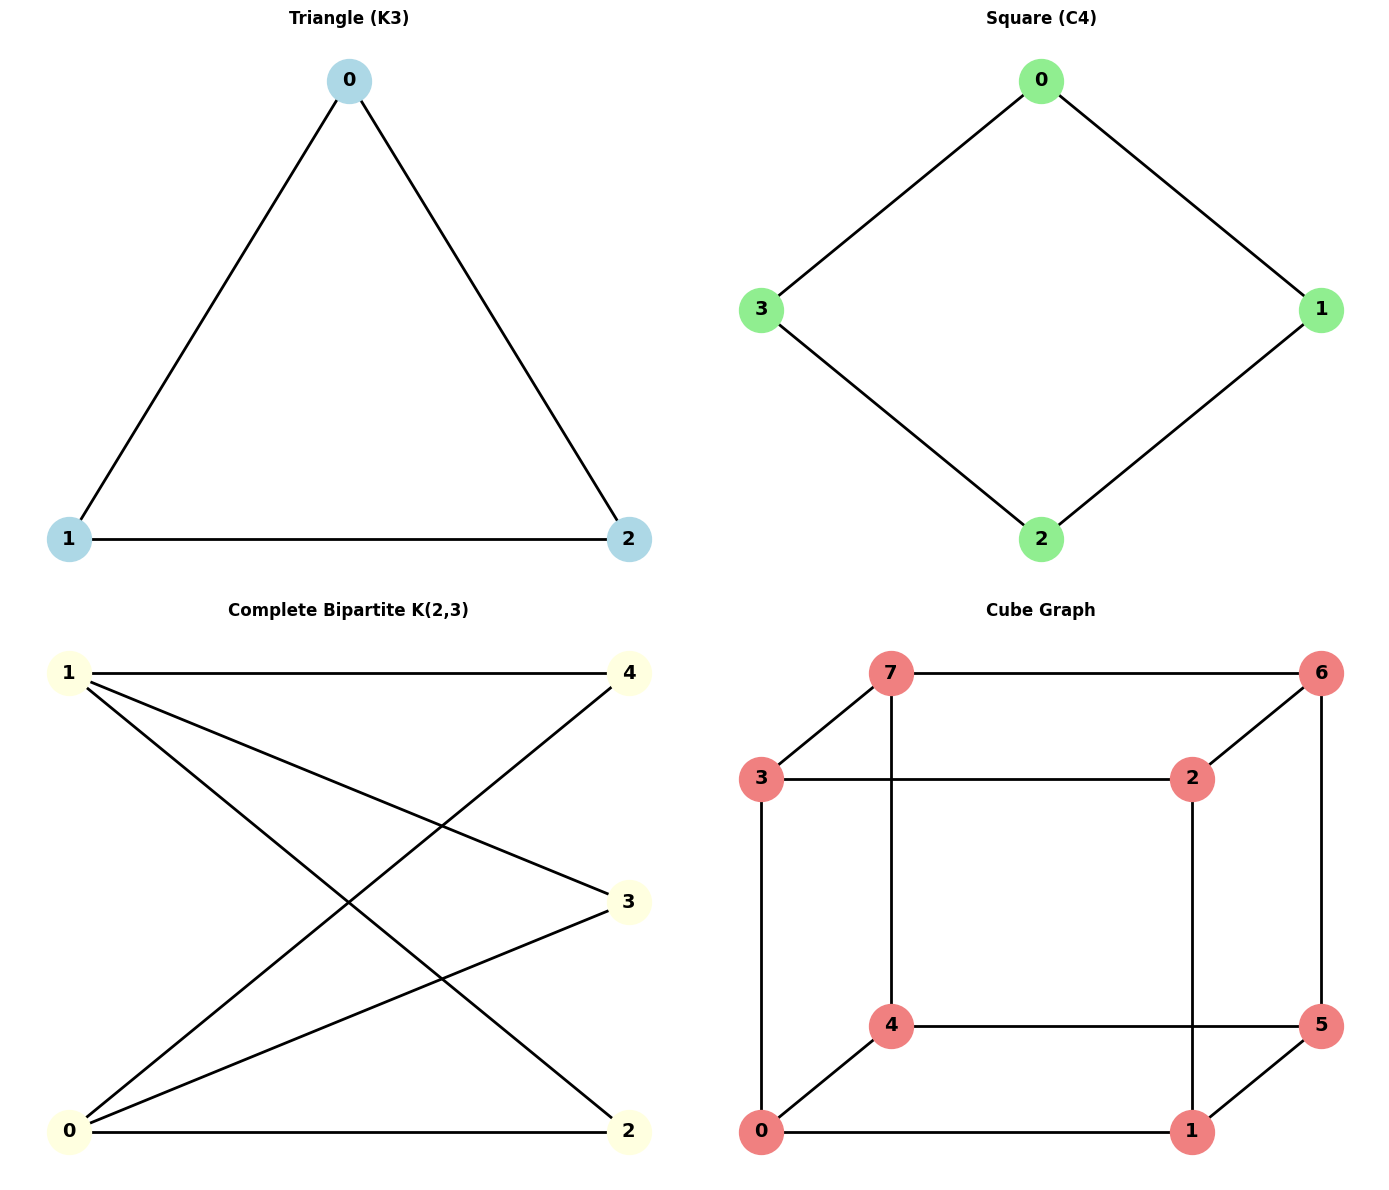


Note: The dual of a planar graph is created by:
1. Placing a vertex in each face of the planar graph (including the outer face)
2. Connecting two vertices if their corresponding faces share an edge

For example, the dual of a triangle is also a triangle (self-dual).
The dual of a square (C4) is also a square.


In [5]:
# For simple examples, let's create planar graphs and show their duals conceptually

def draw_planar_graph_examples():
    """Draw examples of simple planar graphs"""
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))

    # Example 1: Triangle (K3)
    G1 = nx.complete_graph(3)
    pos1 = {0: (0, 1), 1: (-0.866, -0.5), 2: (0.866, -0.5)}
    nx.draw(G1, pos1, ax=axes[0, 0], with_labels=True, node_color='lightblue',
            node_size=1000, font_size=14, font_weight='bold', width=2)
    axes[0, 0].set_title('Triangle (K3)', fontsize=12, fontweight='bold')

    # Example 2: Square (C4)
    G2 = nx.cycle_graph(4)
    pos2 = {0: (0, 1), 1: (1, 0), 2: (0, -1), 3: (-1, 0)}
    nx.draw(G2, pos2, ax=axes[0, 1], with_labels=True, node_color='lightgreen',
            node_size=1000, font_size=14, font_weight='bold', width=2)
    axes[0, 1].set_title('Square (C4)', fontsize=12, fontweight='bold')

    # Example 3: Complete bipartite K(2,3)
    G3 = nx.complete_bipartite_graph(2, 3)
    pos3 = nx.bipartite_layout(G3, [0, 1])
    nx.draw(G3, pos3, ax=axes[1, 0], with_labels=True, node_color='lightyellow',
            node_size=1000, font_size=14, font_weight='bold', width=2)
    axes[1, 0].set_title('Complete Bipartite K(2,3)', fontsize=12, fontweight='bold')

    # Example 4: Cube graph
    G4 = nx.Graph()
    G4.add_edges_from([(0,1), (1,2), (2,3), (3,0), (0,4), (1,5), (2,6), (3,7), (4,5), (5,6), (6,7), (7,4)])
    pos4 = {0: (0, 0), 1: (1, 0), 2: (1, 1), 3: (0, 1),
            4: (0.3, 0.3), 5: (1.3, 0.3), 6: (1.3, 1.3), 7: (0.3, 1.3)}
    nx.draw(G4, pos4, ax=axes[1, 1], with_labels=True, node_color='lightcoral',
            node_size=1000, font_size=14, font_weight='bold', width=2)
    axes[1, 1].set_title('Cube Graph', fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

draw_planar_graph_examples()

print("\nNote: The dual of a planar graph is created by:")
print("1. Placing a vertex in each face of the planar graph (including the outer face)")
print("2. Connecting two vertices if their corresponding faces share an edge")
print("\nFor example, the dual of a triangle is also a triangle (self-dual).")
print("The dual of a square (C4) is also a square.")

### 5. Why is the dual only well-defined for planar graphs?

Why the dual is only well-defined for planar graphs:

1. The dual graph is constructed based on the FACES of a graph.
   - Each face in the planar embedding corresponds to a vertex in the dual.
   - Each edge in the original separates two faces, creating an edge in the dual.

2. For NON-PLANAR graphs:
   - There is no valid planar embedding (cannot be drawn without edge crossings).
   - Without a planar embedding, we cannot define faces properly.
   - Therefore, we cannot construct a dual graph.



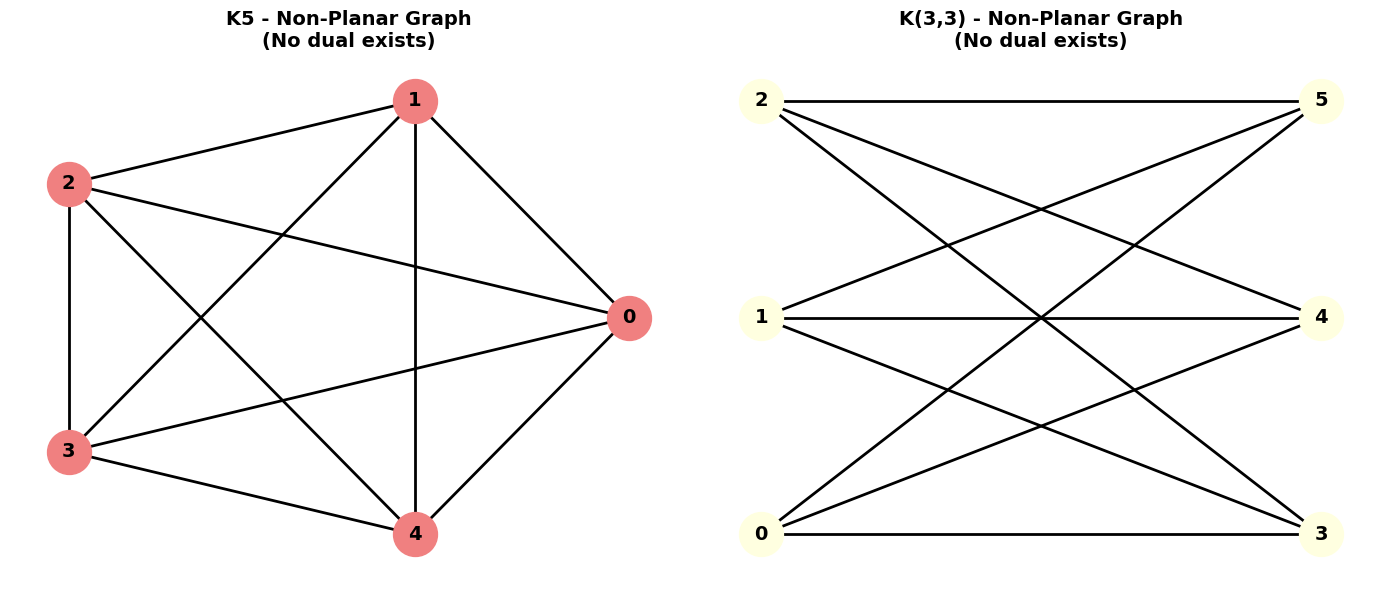


Both K5 and K(3,3) are the classic examples of non-planar graphs.
By Kuratowski's theorem, any non-planar graph contains a subdivision of K5 or K(3,3).
These graphs cannot have duals because they cannot be embedded in a plane.


In [6]:
print("Why the dual is only well-defined for planar graphs:\n")
print("1. The dual graph is constructed based on the FACES of a graph.")
print("   - Each face in the planar embedding corresponds to a vertex in the dual.")
print("   - Each edge in the original separates two faces, creating an edge in the dual.\n")

print("2. For NON-PLANAR graphs:")
print("   - There is no valid planar embedding (cannot be drawn without edge crossings).")
print("   - Without a planar embedding, we cannot define faces properly.")
print("   - Therefore, we cannot construct a dual graph.\n")

# Example of a non-planar graph: K5 (complete graph on 5 vertices)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# K5 - non-planar
K5 = nx.complete_graph(5)
pos_K5 = nx.circular_layout(K5)
nx.draw(K5, pos_K5, ax=ax1, with_labels=True, node_color='lightcoral',
        node_size=1000, font_size=14, font_weight='bold', width=2)
ax1.set_title('K5 - Non-Planar Graph\n(No dual exists)', fontsize=14, fontweight='bold')

# K(3,3) - also non-planar
K33 = nx.complete_bipartite_graph(3, 3)
pos_K33 = nx.bipartite_layout(K33, [0, 1, 2])
nx.draw(K33, pos_K33, ax=ax2, with_labels=True, node_color='lightyellow',
        node_size=1000, font_size=14, font_weight='bold', width=2)
ax2.set_title('K(3,3) - Non-Planar Graph\n(No dual exists)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nBoth K5 and K(3,3) are the classic examples of non-planar graphs.")
print("By Kuratowski's theorem, any non-planar graph contains a subdivision of K5 or K(3,3).")
print("These graphs cannot have duals because they cannot be embedded in a plane.")

## Problem 2: Bron-Kerbosch Algorithm

Given graph G with vertices V = {A, B, C, D} and edges E = {AB, AC, BC, CD}

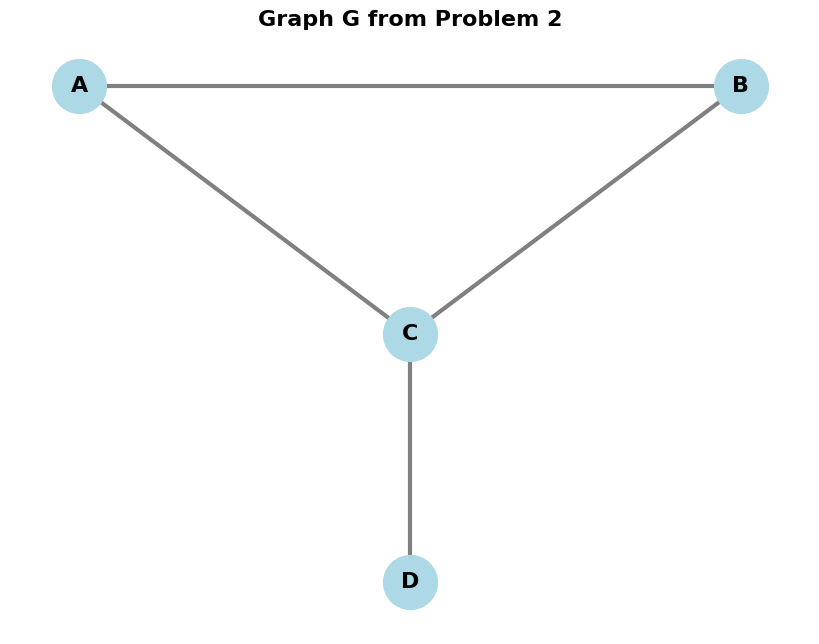

Graph adjacency list:
A: ['B', 'C']
B: ['A', 'C']
C: ['A', 'B', 'D']
D: ['C']


In [7]:
# Create the graph from Problem 2
G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D')])

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = {'A': (0, 1), 'B': (1, 1), 'C': (0.5, 0.5), 'D': (0.5, 0)}
nx.draw(G, pos, with_labels=True, node_color='lightblue',
        node_size=1500, font_size=16, font_weight='bold',
        edge_color='gray', width=3)
plt.title('Graph G from Problem 2', fontsize=16, fontweight='bold')
plt.show()

print("Graph adjacency list:")
for node in sorted(G.nodes()):
    neighbors = sorted(G.neighbors(node))
    print(f"{node}: {neighbors}")

### Bron-Kerbosch Algorithm Implementation

In [8]:
def bron_kerbosch(R, P, X, graph, all_cliques, trace=False, depth=0):
    """
    Bron-Kerbosch algorithm to find all maximal cliques.

    Parameters:
    R: current clique being built
    P: candidate vertices that could extend R
    X: vertices already processed (excluded)
    graph: the input graph
    all_cliques: list to store all maximal cliques found
    trace: if True, print execution trace
    depth: recursion depth for formatting trace
    """
    if trace:
        indent = "  " * depth
        print(f"{indent}Call {depth}: R={sorted(R)}, P={sorted(P)}, X={sorted(X)}")

    if not P and not X:
        # R is a maximal clique
        all_cliques.append(sorted(R))
        if trace:
            print(f"{indent}→ Found maximal clique: {sorted(R)}")
        return

    # Make a copy of P to iterate over
    P_copy = set(P)

    for v in P_copy:
        neighbors = set(graph.neighbors(v))

        bron_kerbosch(
            R.union({v}),
            P.intersection(neighbors),
            X.intersection(neighbors),
            graph,
            all_cliques,
            trace,
            depth + 1
        )

        P = P - {v}
        X = X.union({v})

# Find all maximal cliques
all_cliques = []
vertices = set(G.nodes())

print("\n" + "="*70)
print("Running Bron-Kerbosch Algorithm (with trace)")
print("="*70 + "\n")

bron_kerbosch(set(), vertices, set(), G, all_cliques, trace=True)

print("\n" + "="*70)
print("Results")
print("="*70)
print(f"\nAll maximal cliques found: {all_cliques}")
print(f"\nNumber of maximal cliques: {len(all_cliques)}")


Running Bron-Kerbosch Algorithm (with trace)

Call 0: R=[], P=['A', 'B', 'C', 'D'], X=[]
  Call 1: R=['C'], P=['A', 'B', 'D'], X=[]
    Call 2: R=['A', 'C'], P=['B'], X=[]
      Call 3: R=['A', 'B', 'C'], P=[], X=[]
      → Found maximal clique: ['A', 'B', 'C']
    Call 2: R=['B', 'C'], P=[], X=['A']
    Call 2: R=['C', 'D'], P=[], X=[]
    → Found maximal clique: ['C', 'D']
  Call 1: R=['A'], P=['B'], X=['C']
    Call 2: R=['A', 'B'], P=[], X=['C']
  Call 1: R=['B'], P=[], X=['A', 'C']
  Call 1: R=['D'], P=[], X=['C']

Results

All maximal cliques found: [['A', 'B', 'C'], ['C', 'D']]

Number of maximal cliques: 2


### Answer to Problem 2 Questions

In [9]:
print("Problem 2 Answers:\n")

print("1. Initial call to the algorithm:")
print(f"   R = {sorted(set())} (empty set)")
print(f"   P = {sorted(vertices)} (all vertices)")
print(f"   X = {sorted(set())} (empty set)")

print("\n2. First two recursive calls that lead to reporting a maximal clique:")
print("   Looking at the trace above, the first maximal clique is typically found by:")
print("   - First selecting vertex 'A' (or whichever comes first alphabetically)")
print("   - Then extending with its neighbors that form cliques")
print("   The exact trace shows the R, P, X values at each step.")

print("\n3. All maximal cliques of G:")
for i, clique in enumerate(all_cliques, 1):
    print(f"   Clique {i}: {clique}")

# Find maximum cliques (largest size)
if all_cliques:
    max_size = max(len(c) for c in all_cliques)
    maximum_cliques = [c for c in all_cliques if len(c) == max_size]
    print(f"\n   Maximum clique(s) (size {max_size}): {maximum_cliques}")
    print(f"   These are the largest cliques in the graph.")

Problem 2 Answers:

1. Initial call to the algorithm:
   R = [] (empty set)
   P = ['A', 'B', 'C', 'D'] (all vertices)
   X = [] (empty set)

2. First two recursive calls that lead to reporting a maximal clique:
   Looking at the trace above, the first maximal clique is typically found by:
   - First selecting vertex 'A' (or whichever comes first alphabetically)
   - Then extending with its neighbors that form cliques
   The exact trace shows the R, P, X values at each step.

3. All maximal cliques of G:
   Clique 1: ['A', 'B', 'C']
   Clique 2: ['C', 'D']

   Maximum clique(s) (size 3): [['A', 'B', 'C']]
   These are the largest cliques in the graph.


### Visualize the Maximal Cliques

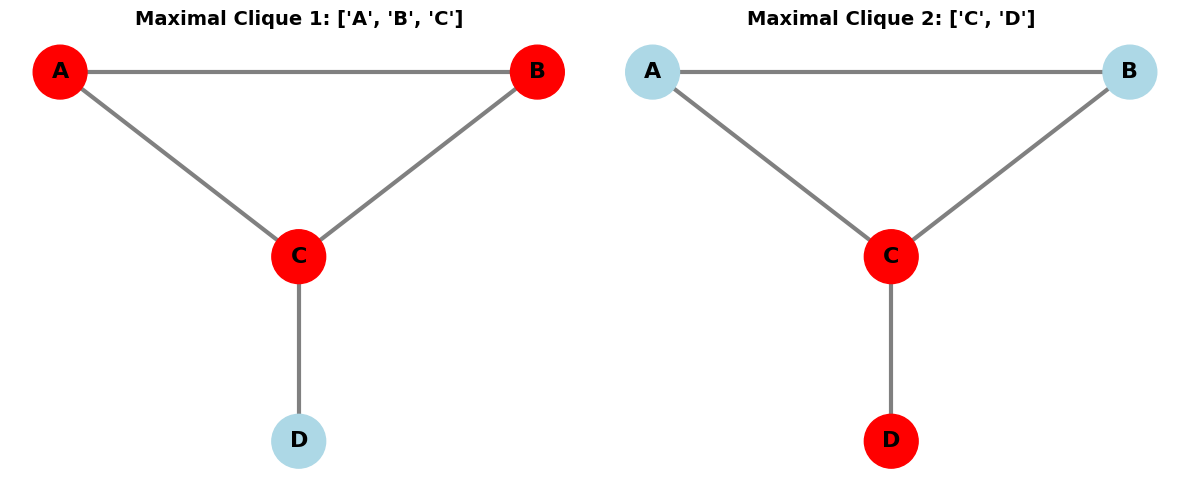

In [10]:
# Visualize each maximal clique
num_cliques = len(all_cliques)
fig, axes = plt.subplots(1, num_cliques, figsize=(6 * num_cliques, 5))

if num_cliques == 1:
    axes = [axes]

pos = {'A': (0, 1), 'B': (1, 1), 'C': (0.5, 0.5), 'D': (0.5, 0)}

for idx, clique in enumerate(all_cliques):
    # Color nodes: clique members in red, others in light blue
    node_colors = ['red' if node in clique else 'lightblue' for node in G.nodes()]

    # Draw the graph with clique highlighted
    nx.draw(G, pos, ax=axes[idx], with_labels=True,
            node_color=node_colors, node_size=1500,
            font_size=16, font_weight='bold',
            edge_color='gray', width=3)

    axes[idx].set_title(f'Maximal Clique {idx + 1}: {clique}',
                        fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Verification using NetworkX built-in function

In [11]:
# Verify our results using NetworkX's built-in function
nx_cliques = list(nx.find_cliques(G))
nx_cliques_sorted = [sorted(c) for c in nx_cliques]
nx_cliques_sorted.sort()

print("Verification using NetworkX find_cliques():")
print(f"NetworkX found cliques: {nx_cliques_sorted}")
print(f"Our algorithm found: {sorted(all_cliques)}")
print(f"\nResults match: {sorted(all_cliques) == nx_cliques_sorted}")

Verification using NetworkX find_cliques():
NetworkX found cliques: [['A', 'B', 'C'], ['C', 'D']]
Our algorithm found: [['A', 'B', 'C'], ['C', 'D']]

Results match: True
